# Numerical Prediction using Model Pipelines

#### Description:

This codebook covers how to use model pipelines to make a numerical prediction.

#### Skill level:

- Advanced

-------------------------
### Import the required libraries

In [ ]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import HELPERS.machine_learning.model_development as md
import HELPERS.machine_learning.model_evaluation as me
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

-------------------------
### Read data into a dataframe

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

-------------------------
### Check shape and head of the dataframe

In [4]:
df_raw.shape

(506, 14)

In [5]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


-------------------------
### Separate features from the label

In [6]:
X_all = df_raw.drop('MDEV', axis=1)

In [7]:
y_true_all = df_raw[['MDEV']].values

-------------------------
### Make a split between training and test sets of data

In [8]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=0.3)

In [9]:
dic_X = {'X_train': X_train, 'X_test': X_test}
dic_y = {'y_true_train': y_true_train, 'y_true_test': y_true_test}

-------------------------
### Fit a model pipeline with a normalizer and linear regressor

In [10]:
ls_clf_select = ['normp_0', 'olsr_0']  # Normalizer + Linear Regression

pipe_refs, dic_pipe_params, dic_best, dic_score, time = md.execute_pipe(ls_clf_select, dic_X, dic_y,
                                                                        split_type='kfold',
                                                                        n_splits=3,
                                                                        cv_type='gridsearch',
                                                                        score_type='neg_mean_absolute_error',
                                                                        prob_type='regression')

print('pipe_refs : ', pipe_refs, '\n')

print('dic_pipe_params:')
print('--------')
print(dic_pipe_params)
print('\n')

print('dic_best:')
print('--------')
print(dic_best)
print('\n')

print('dic_score:')
print('--------')
print(dic_score)
print('\n')

print('time: ', round(time, 2), 'seconds\n\n')

pipe_refs :  [('normp_0', Normalizer()), ('olsr_0', LinearRegression())] 

dic_pipe_params:
--------
{}


dic_best:
--------
{'best_clf': Pipeline(steps=[('normp_0', Normalizer()), ('olsr_0', LinearRegression())]), 'best_param': {}, 'best_score': -3.5375478765480497}


dic_score:
--------
{'explained_variance': 0.7498781392123846, 'mean_absolute_error': 3.029840201733932, 'mean_squared_error': 18.39078961546441, 'mean_squared_log_error': 0.06829203716068703, 'median_absolute_error': 2.127107987896524, 'r2': 0.7498484341205727}


time:  0.04 seconds




-------------------------
### Try a series of different model pipelines

In [11]:
# list of pipelines to try
ls_clf_select = [['mmsp_0', 'dtr_0'],  # MinMax Scaler + DT Regressor
                 ['mmsp_0', 'rfr_1'],  # MinMax Scaler + Random Forest Regressor w parameter optimization
                 ['stdsp_0', 'adabr_1']]  # Standard Scaler + Boosted Tree Regressor w parameter optimization

# score pipelines
for idx, c in enumerate(ls_clf_select):
    print('----------------------------------------------------------')
    print('clf_select : ', c, '\n')
    
    pipe_refs, dic_pipe_params, dic_best, dic_score, time = md.execute_pipe(c, dic_X, dic_y,
                                                                            split_type='kfold',
                                                                            n_splits=3,
                                                                            cv_type='gridsearch',
                                                                            score_type='neg_mean_absolute_error',
                                                                            prob_type='regression')

    print('pipe_refs : ', pipe_refs, '\n')

    print('dic_pipe_params:')
    print('--------')
    print(dic_pipe_params)
    print('\n')

    print('dic_best:')
    print('--------')
    print(dic_best)
    print('\n')

    print('dic_score:')
    print('--------')
    print(dic_score)
    print('\n')

    print('time: ', round(time, 2), 'seconds\n\n')

----------------------------------------------------------
clf_select :  ['mmsp_0', 'dtr_0'] 

pipe_refs :  [('mmsp_0', MinMaxScaler()), ('dtr_0', DecisionTreeRegressor())] 

dic_pipe_params:
--------
{}


dic_best:
--------
{'best_clf': Pipeline(steps=[('mmsp_0', MinMaxScaler()), ('dtr_0', DecisionTreeRegressor())]), 'best_param': {}, 'best_score': -3.221186440677966}


dic_score:
--------
{'explained_variance': 0.6297799206714307, 'mean_absolute_error': 3.2532894736842106, 'mean_squared_error': 27.226907894736847, 'mean_squared_log_error': 0.05183842961990932, 'median_absolute_error': 2.0, 'r2': 0.6296595314104259}


time:  0.03 seconds


----------------------------------------------------------
clf_select :  ['mmsp_0', 'rfr_1'] 

pipe_refs :  [('mmsp_0', MinMaxScaler()), ('rfr_1', RandomForestRegressor())] 

dic_pipe_params:
--------
{'rfr_1__n_estimators': [8, 9, 10, 11, 12], 'rfr_1__min_samples_split': [2, 3, 4, 5, 6], 'rfr_1__min_samples_leaf': [1, 2, 3], 'rfr_1__max_features': 

-------------------------
### Generate predictions using the best pipeline

In [12]:
clf = dic_best['best_clf']

In [13]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

-------------------------
### Check predictions against actuals

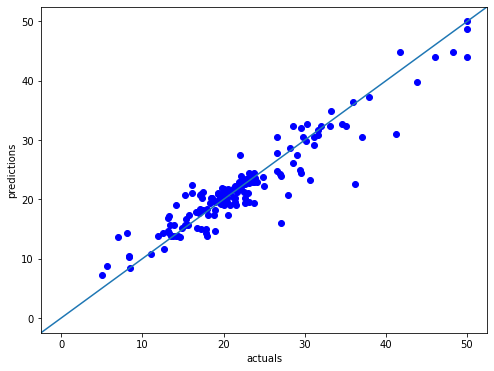

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=y_true_test, y=y_pred_test, color='b')
ax.axline([0, 0], [1, 1])

plt.xlabel('actuals')
plt.ylabel('predictions')
plt.show()

-------------------------
### Get model performance metrics

In [15]:
me.get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 0.0054
explained_variance_score 0.9999
mean_absolute_error 0.0133
mean_squared_error 0.0054
median_absolute_error 0.0
r2_score 0.9999


In [16]:
me.get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 8.8174
explained_variance_score 0.8806
mean_absolute_error 2.0296
mean_squared_error 8.8174
median_absolute_error 1.3
r2_score 0.8801
